In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Load dataset
train = pd.read_csv('/Users/mitchelljohnson/Downloads/train.csv')
train_copy = train.copy()  # Preserve original data
identify = train['Id']  # Store Id column separately

In [6]:
le = preprocessing.LabelEncoder()

In [8]:
categorical_features = ['Neighborhood', 'Condition1', 'Condition2', 'Functional', 'MSZoning', 'Street', 'LotShape',
                        'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'SaleType', 'SaleCondition', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
                        'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive']

In [10]:
for col in categorical_features:
    train[col] = le.fit_transform(train[col])

In [12]:
train.dropna(axis=1, inplace=True)

In [48]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
##Expirement 1

In [52]:
features_exp1 = ['Neighborhood', 'Condition1', 'Condition2', 'GrLivArea', 'OverallCond', 'YearBuilt',
                 'Functional', 'LotArea', 'ExterQual', 'ExterCond']
X1_train, X1_test = X_train[features_exp1], X_test[features_exp1]

y1_train, y1_test = y_train, y_test

In [54]:
# Train Linear Regression Model
lin_model1 = LinearRegression()
lin_model1.fit(X1_train, y1_train)


LinearRegression()

In [56]:
coeff1 = lin_model1.score(X1_train, y1_train)
print(f'Coefficient of Determination for Experiment 1: {coeff1:.4f}')
print(f'Intercept: {lin_model1.intercept_:.4f}')

Coefficient of Determination for Experiment 1: 0.7228
Intercept: -1574559.7339


In [60]:
## Display coeficients 
df_coeff1 = pd.DataFrame(lin_model1.coef_, X1_train.columns, columns=['Coefficient'])
print(df_coeff1)

               Coefficient
Neighborhood    847.980027
Condition1       -9.360281
Condition2   -21969.069784
GrLivArea        75.331592
OverallCond    8830.537700
YearBuilt       836.284926
Functional     5400.864120
LotArea           0.748936
ExterQual    -28803.999096
ExterCond      3026.997381


In [62]:
# Predictions & Error Metrics
y1_pred = lin_model1.predict(X1_test)
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y1_test, y1_pred):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y1_test, y1_pred):.4f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)):.4f}')

Mean Absolute Error: 26285.5574
Mean Squared Error: 1608946603.5010
Root Mean Squared Error: 40111.6766


In [64]:
##Expirement 2

In [66]:
non_numeric_cols = train.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Warning: Some categorical features were not encoded:", non_numeric_cols.tolist())
    for col in non_numeric_cols:
        train[col] = le.fit_transform(train[col])

In [68]:
train.fillna(train.median(), inplace=True)

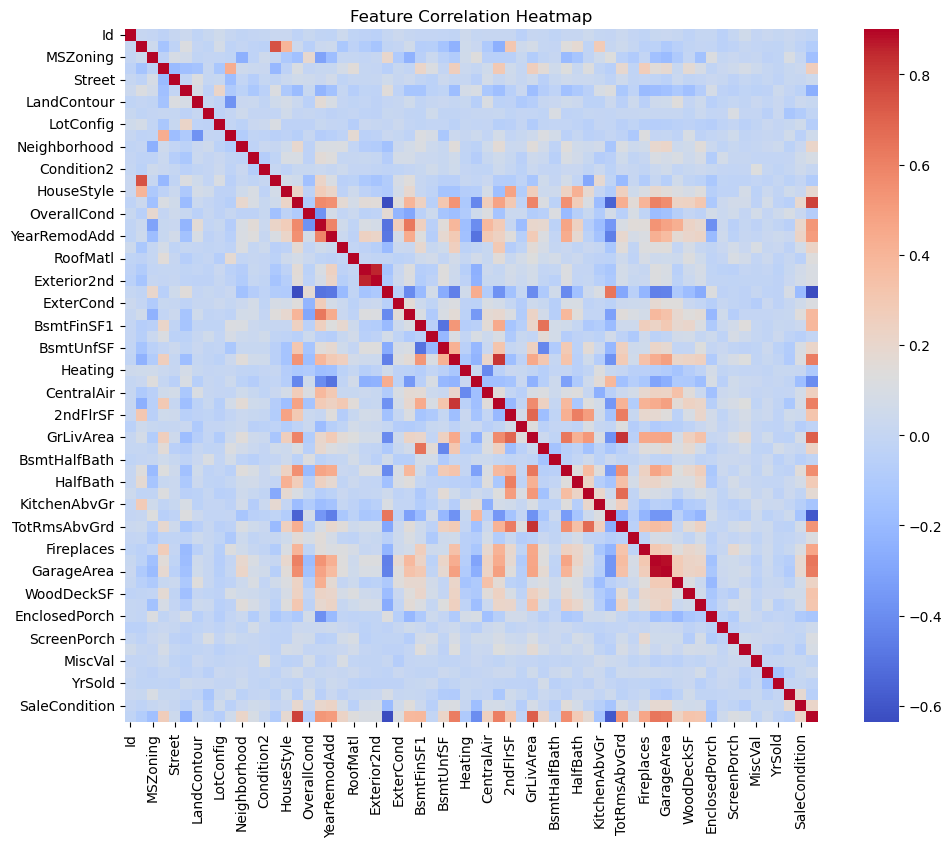

In [72]:
# Heatmap 
plt.figure(figsize=(12, 9))
sns.heatmap(train.corr(), vmax=0.9, square=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [74]:
# Feature selection for second experiment
features_exp2 = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath', 'TotalBsmtSF',
                 '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1']
X2_train, X2_test = X_train[features_exp2], X_test[features_exp2]

y2_train, y2_test = y_train, y_test

In [78]:
# Train 
lin_model2 = LinearRegression()
lin_model2.fit(X2_train, y2_train)

LinearRegression()

In [80]:
# Model evaluation
coeff2 = lin_model2.score(X2_train, y2_train)
print(f'Coefficient of Determination for Experiment 2: {coeff2:.4f}')
print(f'Intercept: {lin_model2.intercept_:.4f}')


Coefficient of Determination for Experiment 2: 0.7712
Intercept: -1229909.1193


In [86]:
## Display Coeficients
df_coeff2 = pd.DataFrame(lin_model2.coef_, X2_train.columns, columns=['Coefficient'])
print(df_coeff2)

               Coefficient
OverallQual   19333.679940
GrLivArea        35.276443
GarageCars    14712.904882
GarageArea        6.842708
FullBath      -2244.406253
TotalBsmtSF       3.851065
1stFlrSF         10.378481
YearBuilt       232.924697
YearRemodAdd    356.414417
TotRmsAbvGrd   2344.645979
Fireplaces     9818.200528
BsmtFinSF1       19.627229


In [88]:
# Predictions 
y2_pred = lin_model2.predict(X2_test)
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y2_test, y2_pred):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y2_test, y2_pred):.4f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)):.4f}')

Mean Absolute Error: 24192.9324
Mean Squared Error: 1342495966.8402
Root Mean Squared Error: 36640.0869


In [90]:
##Expirement 3

In [94]:
features_exp3 = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'Fireplaces']
X3_train, X3_test = X_train[features_exp3], X_test[features_exp3]
y3_train, y3_test = y_train, y_test

In [100]:
# Train 
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X3_train, y3_train)

DecisionTreeRegressor(random_state=42)

In [102]:
dt_score = dt_model.score(X3_train, y3_train)
print(f'Coefficient of Determination for Experiment 3 (Decision Tree): {dt_score:.4f}')

Coefficient of Determination for Experiment 3 (Decision Tree): 0.9999


In [106]:
# Predictions 
y3_pred = dt_model.predict(X3_test)
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y3_test, y3_pred):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y3_test, y3_pred):.4f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)):.4f}')

Mean Absolute Error: 26057.7763
Mean Squared Error: 1448040386.2055
Root Mean Squared Error: 38053.1258
